In [95]:
import pandas as pd
from matplotlib.pyplot import matplotlib as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

In [5]:
df = pd.read_csv('ObesityDataset.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,HighCaloricFoodConsumption,VegetableMeals,MealsPerDay,FoodBetweenMeals,SMOKE,DailyWaterIntake,DailyCaloriesMonitoring,PhysicalActivities,TechDeviceUseage,AlcoholConsumption,MeansOfTransport,Obesity_Level
0,Female,21,2,64,yes,no,2.0,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,2,56,yes,no,3.0,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,2,77,yes,no,2.0,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,2,87,no,no,3.0,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,2,90,no,no,2.0,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


<Axes: xlabel='count', ylabel='Obesity_Level'>

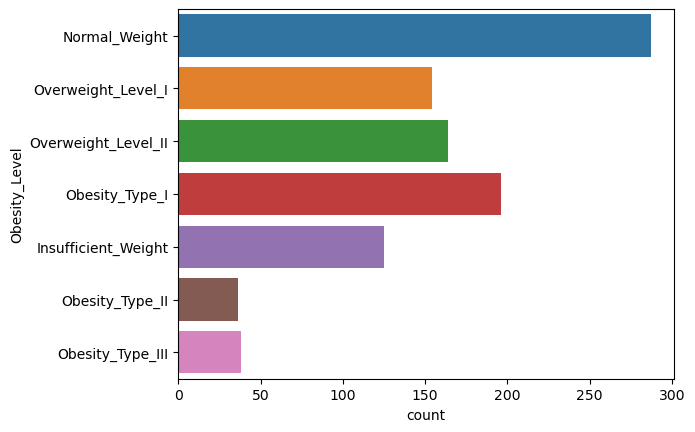

In [19]:
#CountPlot showing the Obesity_Level distribution within the DataSet.
sns.countplot(data=df, y='Obesity_Level', hue='Obesity_Level')
#plt.title('Obesity_Levels Count')

In [51]:
encoder = LabelEncoder()
df['family_history_with_overweight'] = encoder.fit_transform(df['family_history_with_overweight'])
joblib.dump(encoder, 'FamHist.pkl')

['FamHist.pkl']

In [53]:
encoder = LabelEncoder()
df['HighCaloricFoodConsumption'] = encoder.fit_transform(df['HighCaloricFoodConsumption'])
joblib.dump(encoder, 'HighCalories.pkl')

['HighCalories.pkl']

In [125]:
encoder = LabelEncoder()
df['FoodBetweenMeals'] = encoder.fit_transform(df['FoodBetweenMeals'])
joblib.dump(encoder, 'FoodBetweenMeals.pkl')

['FoodBetweenMeals.pkl']

In [57]:
encoder = LabelEncoder()
df['SMOKE'] = encoder.fit_transform(df['SMOKE'])
joblib.dump(encoder, 'Smoker.pkl')

['Smoker.pkl']

In [59]:
encoder = LabelEncoder()
df['AlcoholConsumption'] = encoder.fit_transform(df['AlcoholConsumption'])
joblib.dump(encoder, 'AlcoholConsumption.pkl')

['AlcoholConsumption.pkl']

In [61]:
encoder = LabelEncoder()
df['MeansOfTransport'] = encoder.fit_transform(df['MeansOfTransport'])
joblib.dump(encoder, 'MeansOfTransport.pkl')

['MeansOfTransport.pkl']

In [63]:
encoder = LabelEncoder()
df['Obesity_Level'] = encoder.fit_transform(df['Obesity_Level'])
joblib.dump(encoder, 'ObesityLevel.pkl')

['ObesityLevel.pkl']

In [65]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,HighCaloricFoodConsumption,VegetableMeals,MealsPerDay,FoodBetweenMeals,SMOKE,DailyWaterIntake,DailyCaloriesMonitoring,PhysicalActivities,TechDeviceUseage,AlcoholConsumption,MeansOfTransport,Obesity_Level
0,Female,21,2,64,1,0,2.0,3,2,0,2,no,0,1,3,3,1
1,Female,21,2,56,1,0,3.0,3,2,1,3,yes,3,0,2,3,1
2,Male,23,2,77,1,0,2.0,3,2,0,2,no,2,1,1,3,1
3,Male,27,2,87,0,0,3.0,3,2,0,2,no,2,0,1,4,5
4,Male,22,2,90,0,0,2.0,1,2,0,2,no,0,0,2,3,6


In [75]:
x = df.drop(['Gender', 'Age', 'Height', 'Weight', 'VegetableMeals', 'DailyWaterIntake', 'DailyCaloriesMonitoring', 'TechDeviceUseage', 'Obesity_Level'], axis=1)
x.head()

,family_history_with_overweight,HighCaloricFoodConsumption,MealsPerDay,FoodBetweenMeals,SMOKE,PhysicalActivities,AlcoholConsumption,MeansOfTransport
0,1,0,3,2,0,0,3,3
1,1,0,3,2,1,3,2,3
2,1,0,3,2,0,2,1,3
3,0,0,3,2,0,2,1,4
4,0,0,1,2,0,0,2,3


In [77]:
y = df['Obesity_Level']
y.head()

0    1
1    1
2    1
3    5
4    6
Name: Obesity_Level, dtype: int32

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

ProjectModel = RandomForestClassifier()
ProjectModel.fit(x_train, y_train)

RandomForestClassifier()

In [107]:
TrainAccu = ProjectModel.score(x_train, y_train)
TrainAccu

0.72

In [109]:
Pred = ProjectModel.predict(x_test)

In [111]:
accuracy_score(y_test, Pred)

0.55

In [121]:
joblib.dump(ProjectModel, 'ProjectModel.pkl')

['ProjectModel.pkl']

In [113]:
KNModel = KNeighborsClassifier()
KNModel.fit(x_train, y_train)


KNeighborsClassifier()

In [115]:
TrainingAccu = KNModel.score(x_train, y_train)
TrainingAccu

0.5844444444444444

In [117]:
Predict = KNModel.predict(x_test)

In [119]:
accuracy_score(y_test, Predict)

0.48